In [10]:
# 상수와 텐서
import tensorflow as tf
import numpy as np

In [4]:
x = tf.ones(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [5]:
x = tf.zeros(shape=(2,1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [11]:
# 랜덤 텐서
x = tf.random.normal(shape=(3,1),mean=0,stddev=1)
x

0.073018946

In [13]:
x = tf.random.uniform(shape=(3,1),minval=0,maxval=1)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.8424088],
       [0.968266 ],
       [0.3824594]], dtype=float32)>

In [14]:
#넘파이에 값 할당
x = np.ones(shape=(2,2))
x[0,0] = 0
x

array([[0., 1.],
       [1., 1.]])

In [15]:
# 텐서플로 변수 만들기
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-1.298221  ],
       [-0.9620788 ],
       [ 0.36374936]], dtype=float32)>

In [16]:
v.assign(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [17]:
# 변수 일부에 값 할당
v[0,0].assign(3)
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [19]:
v.assign_add(tf.ones((3,1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [26]:
# 텐서플로 기본적인 수학연산
a = tf.ones((2,2))
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(b)
print(c)
d = b+c
print(d)
e = tf.matmul(a,d) 
print(e)
e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[8. 8.]
 [8. 8.]], shape=(2, 2), dtype=float32)


In [39]:
from numpy.lib.function_base import gradient
# gradientTape 사용
input_var = tf.Variable(initial_value=3.)  
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result,input_var)  

In [40]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
  result = tf.square(input_var)
gradient = tape.gradient(result,input_var)  

In [44]:
# 중첩
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    position = 4.9 * time**2
  speed = inner_tape.gradient(position,time) 
acceleration = outer_tape.gradient(speed,time)  

In [45]:
# 텐서플로 선형 분류기

In [46]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean = [0,3],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)
positive_samples = np.random.multivariate_normal(
    mean = [3,0],
    cov = [[1,0.5],[0.5,1]],
    size = num_samples_per_class
)

In [48]:
negative_samples.shape

(1000, 2)

In [49]:
# 한 배열에 쌓기
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

In [51]:
inputs.shape

(2000, 2)

In [52]:
# 0 1로 되어 있는 타깃을 구성
targets =  np.vstack(
    (
      np.zeros((1000,1),dtype = 'float32'),
      np.ones((1000,1),dtype = 'float32')
    )
    
)

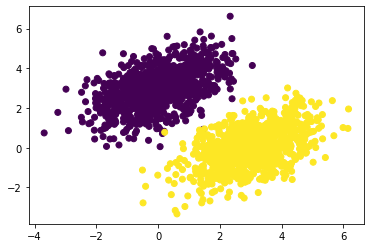

In [58]:
# 셈플 데이터 시각화
import matplotlib.pylab as plt
plt.scatter(inputs[:,0],inputs[:,1], c=targets[:,0])
plt.show()

In [59]:
# 선형 분류기의 변수 
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [60]:
# 정방향 패스 함수
def model(inputs):
  return tf.matmul(inputs,W) + b

In [68]:
# 평균 제곱 오차 손실함수
def squared_loss(target,predictions):
  per_sample_losses = tf.square(target-predictions)
  return tf.reduce_mean(per_sample_losses)

In [69]:
# 스텝 훈련 함수
learning_rate = 0.1
def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = squared_loss(targets,predictions)
  grad_loss_wrd_W, grad_loss_wrd_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrd_W*learning_rate)
  b.assign_sub(grad_loss_wrd_b*learning_rate)
  return loss

In [70]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"{step}번째 스텝의 손실 : {loss:.4f}")

0번째 스텝의 손실 : 0.0292
1번째 스텝의 손실 : 0.0289
2번째 스텝의 손실 : 0.0285
3번째 스텝의 손실 : 0.0282
4번째 스텝의 손실 : 0.0280
5번째 스텝의 손실 : 0.0277
6번째 스텝의 손실 : 0.0275
7번째 스텝의 손실 : 0.0273
8번째 스텝의 손실 : 0.0271
9번째 스텝의 손실 : 0.0269
10번째 스텝의 손실 : 0.0268
11번째 스텝의 손실 : 0.0266
12번째 스텝의 손실 : 0.0265
13번째 스텝의 손실 : 0.0264
14번째 스텝의 손실 : 0.0263
15번째 스텝의 손실 : 0.0262
16번째 스텝의 손실 : 0.0261
17번째 스텝의 손실 : 0.0260
18번째 스텝의 손실 : 0.0259
19번째 스텝의 손실 : 0.0258
20번째 스텝의 손실 : 0.0258
21번째 스텝의 손실 : 0.0257
22번째 스텝의 손실 : 0.0256
23번째 스텝의 손실 : 0.0256
24번째 스텝의 손실 : 0.0256
25번째 스텝의 손실 : 0.0255
26번째 스텝의 손실 : 0.0255
27번째 스텝의 손실 : 0.0254
28번째 스텝의 손실 : 0.0254
29번째 스텝의 손실 : 0.0254
30번째 스텝의 손실 : 0.0253
31번째 스텝의 손실 : 0.0253
32번째 스텝의 손실 : 0.0253
33번째 스텝의 손실 : 0.0253
34번째 스텝의 손실 : 0.0253
35번째 스텝의 손실 : 0.0252
36번째 스텝의 손실 : 0.0252
37번째 스텝의 손실 : 0.0252
38번째 스텝의 손실 : 0.0252
39번째 스텝의 손실 : 0.0252


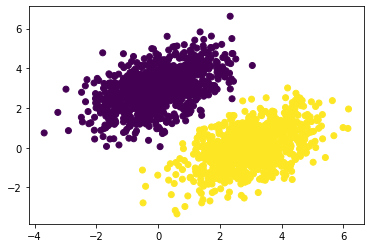

In [73]:
predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0] > 0.5)
plt.show()

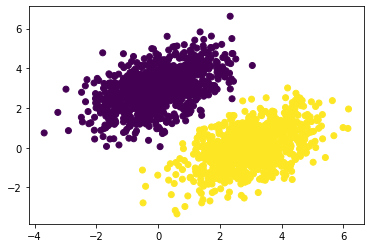

tf.Tensor([0.46544707], shape=(1,), dtype=float32) tf.Tensor([0.5079292], shape=(1,), dtype=float32)


In [87]:
start_end = [[-4.,-4.],[6.,6.]]
line_data = model(start_end)

predictions = model(inputs)
plt.scatter(inputs[:,0],inputs[:,1], c=predictions[:,0] > 0.5)
plt.plot(line_data[0],line_data[1],'-r')
plt.show()
print(line_data[0],line_data[1])

In [84]:
line_data

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.46544707],
       [0.5079292 ]], dtype=float32)>